In [15]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Memuat dataset
df = pd.read_csv("style_dataset.csv")

# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Style     20 non-null     object
 1   Item      20 non-null     object
 2   Color     20 non-null     object
 3   Material  20 non-null     object
 4   Occasion  20 non-null     object
 5   Gender    20 non-null     object
 6   Season    20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [18]:
# Melihat data teratas untuk memahami struktur dataset
display("Contoh data:", df.head())

'Contoh data:'

,Style,Item,Color,Material,Occasion,Gender,Season
0,Casual,T-shirt,Blue,Cotton,Daily,Unisex,Summer
1,Formal,Blazer,Black,Wool,Business,Male,Winter
2,Sporty,Sneakers,White,Polyester,Exercise,Unisex,All
3,Vintage,Dress,Brown,Denim,Party,Female,Spring
4,Casual,Jeans,Blue,Denim,Daily,Unisex,All


In [19]:
# 5. Memeriksa distribusi kelas untuk melihat apakah dataset seimbang
display("Distribusi Kelas:", df['Style'].value_counts())

'Distribusi Kelas:'

,count
Style,
Casual,5
Formal,5
Sporty,5
Vintage,5


In [20]:
# Mengisi nilai kosong (jika ada)
df.fillna('', inplace=True)

In [21]:
# Menggabungkan fitur teks menjadi satu string untuk setiap baris
df['Features'] = df[['Item', 'Color', 'Material', 'Occasion', 'Gender', 'Season']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [22]:
# Menampilkan beberapa contoh fitur teks yang digabungkan
display("Contoh Fitur Gabungan:", df['Features'].head())

'Contoh Fitur Gabungan:'

,Features
0,T-shirt Blue Cotton Daily Unisex Summer
1,Blazer Black Wool Business Male Winter
2,Sneakers White Polyester Exercise Unisex All
3,Dress Brown Denim Party Female Spring
4,Jeans Blue Denim Daily Unisex All


In [23]:
# Memisahkan variabel fitur dan target
X = df['Features']
y = df['Style']

In [24]:
# Mengonversi teks menjadi vektor numerik dengan CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Menampilkan jumlah fitur setelah vektorisasi
print("Jumlah fitur setelah vektorisasi:", len(vectorizer.get_feature_names_out()))

# Melihat contoh hasil vektorisasi
print("Contoh fitur vektorisasi:\n", X_vectorized.toarray()[:5])

Jumlah fitur setelah vektorisasi: 55
Contoh fitur vektorisasi:
 [[0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [25]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

# Melihat ukuran data latih dan data uji
print("Ukuran Data Latih:", X_train.shape)
print("Ukuran Data Uji:", X_test.shape)


Ukuran Data Latih: (15, 55)
Ukuran Data Uji: (5, 55)


In [27]:
# Menginisialisasi model Naïve Bayes
model = MultinomialNB()

# Melatih model dengan data latih
model.fit(X_train, y_train)

#  Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [28]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

Akurasi Model: 0.8


In [29]:
# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      Casual       1.00      0.50      0.67         2
      Formal       1.00      1.00      1.00         2
      Sporty       0.00      0.00      0.00         0
     Vintage       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.75      0.62      0.67         5
weighted avg       1.00      0.80      0.87         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


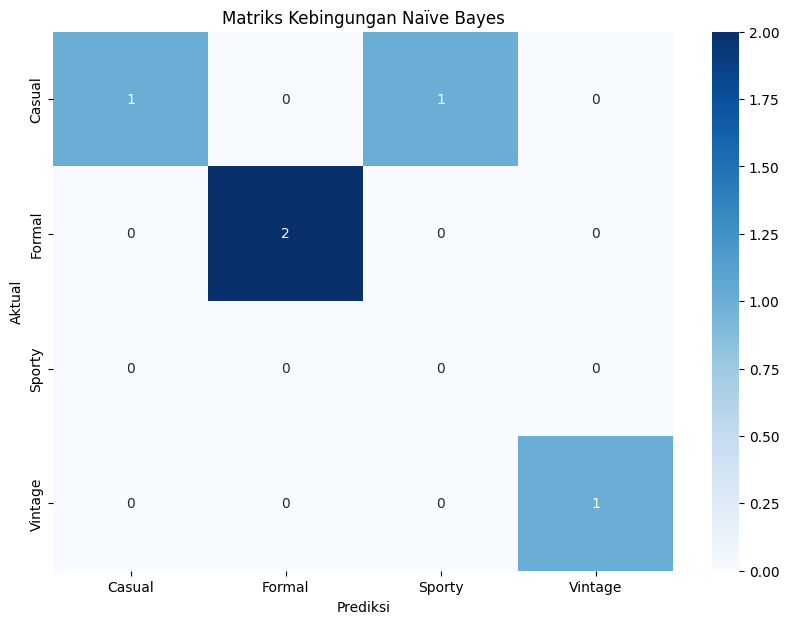

In [30]:
# Menampilkan matriks kebingungan untuk visualisasi hasil
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Kebingungan Naïve Bayes")
plt.show()